In [31]:
from __future__ import print_function
import sys
#standard libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
#Ros related libraries
import yaml
import rospy
import rosbag
import glob # for open all files
import re
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import math
import scipy.interpolate as inter
import pylab as plt
from matplotlib.ticker import FormatStrFormatter

In [6]:
# Open all the bag files and save into dictionaries

input_bags=dict()
# idata=dict()
# rdata=dict()
# idata_std=dict()
# rdata_std=dict()
names=[]
scans=dict()

angle_min = -2.35619449615
angle_max = 2.35619449615
angle_increment = 0.00436332309619
theta = np.arange(angle_min, angle_max, angle_increment)


path = '/home/jiang/Desktop/Exper10F2017-03-22/*.bag'   
files=glob.glob(path)   
for file in files:
    try:
        name = int(file[39:-4])
    except ValueError:
        name = file[39:-4]
    names.append(name)
    input_bags[name]=file
names.sort()
print(input_bags)

{0: '/home/jiang/Desktop/Exper10F2017-03-22/00.bag', 130: '/home/jiang/Desktop/Exper10F2017-03-22/130.bag', 260: '/home/jiang/Desktop/Exper10F2017-03-22/260.bag', 390: '/home/jiang/Desktop/Exper10F2017-03-22/390.bag', 520: '/home/jiang/Desktop/Exper10F2017-03-22/520.bag', 10: '/home/jiang/Desktop/Exper10F2017-03-22/10.bag', 140: '/home/jiang/Desktop/Exper10F2017-03-22/140.bag', 270: '/home/jiang/Desktop/Exper10F2017-03-22/270.bag', 400: '/home/jiang/Desktop/Exper10F2017-03-22/400.bag', 530: '/home/jiang/Desktop/Exper10F2017-03-22/530.bag', 20: '/home/jiang/Desktop/Exper10F2017-03-22/20.bag', 150: '/home/jiang/Desktop/Exper10F2017-03-22/150.bag', 280: '/home/jiang/Desktop/Exper10F2017-03-22/280.bag', 410: '/home/jiang/Desktop/Exper10F2017-03-22/410.bag', 540: '/home/jiang/Desktop/Exper10F2017-03-22/540.bag', 30: '/home/jiang/Desktop/Exper10F2017-03-22/30.bag', 160: '/home/jiang/Desktop/Exper10F2017-03-22/160.bag', 290: '/home/jiang/Desktop/Exper10F2017-03-22/290.bag', 420: '/home/jiang/

In [7]:
n = 0
for topic, msg, t in rosbag.Bag(input_bags[150]):
    if topic == '/last' and n == 0:
        print(msg.intensities)
        n+=1


(3887.0, 3830.0, 3873.0, 3886.0, 3840.0, 3937.0, 3900.0, 3928.0, 3997.0, 3986.0, 4014.0, 3999.0, 3944.0, 4015.0, 3940.0, 3801.0, 3848.0, 3804.0, 3843.0, 3841.0, 3858.0, 3785.0, 3757.0, 3785.0, 3774.0, 3807.0, 3775.0, 3730.0, 3708.0, 3734.0, 3700.0, 3704.0, 3709.0, 3683.0, 3667.0, 3682.0, 3699.0, 3613.0, 3195.0, 2734.0, 2754.0, 2846.0, 2699.0, 2676.0, 2636.0, 2643.0, 2639.0, 2647.0, 2614.0, 2623.0, 2630.0, 2617.0, 2637.0, 2598.0, 2593.0, 2616.0, 2772.0, 3396.0, 3622.0, 3415.0, 3384.0, 3241.0, 2569.0, 2483.0, 2416.0, 2658.0, 2935.0, 2928.0, 2786.0, 3008.0, 2919.0, 2596.0, 2447.0, 2447.0, 2470.0, 2508.0, 2484.0, 2480.0, 2474.0, 2489.0, 2476.0, 2461.0, 2465.0, 2457.0, 2475.0, 2488.0, 2521.0, 2453.0, 2531.0, 2292.0, 2501.0, 2574.0, 2548.0, 2565.0, 2583.0, 2565.0, 2603.0, 2552.0, 2617.0, 2585.0, 2574.0, 1896.0, 2107.0, 2141.0, 2028.0, 2007.0, 1985.0, 1950.0, 1943.0, 1943.0, 1928.0, 1785.0, 1768.0, 1778.0, 1621.0, 1657.0, 1485.0, 1442.0, 1361.0, 1339.0, 1320.0, 1301.0, 1377.0, 2367.0, 1269.0,

In [8]:
for key, value in input_bags.iteritems():
    #print(key, value)
    intensities_f=[]
    ranges_f=[]
    intensities_s=[]
    ranges_s=[]
    idata_f = []
    
    for topic, msg, t in rosbag.Bag(value):
        if topic=='/first':
            # allfor topic, msg, t in rosbag.Bag(input_bags[00]):
            intensities_f.append(msg.intensities)
            ranges_f.append(msg.ranges)
        if topic=='/last':
            # allfor topic, msg, t in rosbag.Bag(input_bags[00]):
            intensities_s.append(msg.intensities)
            ranges_s.append(msg.ranges)
            
    idata_f = np.asarray(intensities_f)  # change a list of lists into an array 
    idata_f = np.mean(idata_f,axis=0)
    #idata_std_f[key] = np.std(idata[key],axis=0)
    rdata_f = np.asarray(ranges_f)  # f = first
    rdata_f = np.mean(rdata_f,axis=0)
    idata_s = np.asarray(intensities_s)  # s = second
    idata_s = np.mean(idata_s,axis=0)
    rdata_s = np.asarray(ranges_s)
    rdata_s = np.mean(rdata_s,axis=0)
    scan = [theta, idata_f, rdata_f, idata_s, rdata_s]
    scan = np.asarray(scan).T
    scans[key] = scan
#   scans = [theta, intensity-1, range-1, intensity-2, range-2]

In [9]:
# function of fingding the target point theta Version 1
def findtheta(p,q,l):
    # p: position of sensor, (x, y) and  x = 0
    # q: position of target point, (a, b) and a = 106.5
    x = p[0] 
    y = p[1]
    a = q[0]
    b = q[1]
    theta2 = - np.arctan2(a-x, b+l-y)
    theta1 = - np.arctan2(a-x, b+l-y)
    #print('degree: ', np.degrees(theta))
    return (theta1,theta2)

In [10]:
# function of fingding the target point theta Version 2
def findtheta(p,q,l):
    # p: position of sensor, (x, y) and  x = 0
    # q: position of target point, (a, b) and a = 106.5
    x = p[0] 
    y = p[1]
    a = q[0]
    b = q[1]
    theta2 = - np.arctan2(a-x, b+l-y)
    theta1 = - np.arctan2(a-x, b-l-y)
    #print('degree: ', np.degrees(theta1),np.degrees(theta2))
    if theta1 > theta2:
        return (theta2,theta1)
    else:
        return (theta1,theta2)

In [25]:
# get all the scan value of target grid
def getargets(q):
    targets = {}
    for key, value in scans.iteritems():
        p = [0, key]      # input sensor position
        #q = [106.5, 440]  # input target point position
        l = 3       # input the area length, unit: cm
        theta = findtheta(p, q, l)
        tar = []
        for i in np.arange(scans[key].shape[0]):
            alpha=scans[key][i,0]
            dista = math.hypot(p[0]-q[0], p[1]-q[1])/100
            if theta[0] < alpha < theta[1] and abs(scans[key][i,2] -dista) < 0.2:
                dista = math.hypot(p[0]-q[0], p[1]-q[1])/100
                s = np.append(scans[key][i], dista)
                tar.append(s)
        if len(tar) != 0:
            tar = np.mean(np.asarray(tar), axis = 0)
            targets[key]=tar
#     for key in sorted(targets):
#         print(key, "%0.2f" %np.degrees(targets[key][0]), targets[key]/n)
#         print(key, targets[key][2]-targets[key][5])
    return targets
    # tar = [theta, intensity-1, range-1, intensity-2, range-2, real-distance]
getargets([106.5, 340])

{280: array([  -1.05810588,  149.17801047,    1.24435655,  191.37120419,
           6.65578691,    1.22238496]),
 290: array([  -1.13228237,  210.69166667,    1.16738541,  373.97736842,
           7.63987842,    1.17653092]),
 300: array([  -1.21300384,  324.24449761,    1.12996842,  215.07118807,
           5.62441992,    1.1376401 ]),
 310: array([  -1.29808865,  550.74647266,    1.10133642,  677.08112875,
           7.21368077,    1.10644702]),
 320: array([   -1.38535511,  1038.20506108,     1.06907635,   699.20942408,
            7.08042452,     1.08361663]),
 330: array([ -1.47698489e+00,   1.85337412e+03,   1.07009649e+00,
          3.89228185e+02,   7.38799302e+00,   1.06968453e+00]),
 340: array([ -1.57079634e+00,   6.32114648e+03,   1.06838380e+00,
          4.97678157e+03,   4.29894117e+00,   1.06500000e+00]),
 350: array([ -1.66460779e+00,   1.88711126e+03,   1.06661082e+00,
          3.25153578e+02,   7.90262303e+00,   1.06968453e+00]),
 360: array([ -1.75623757e+00,   1.2

In [15]:
def pltsmoo(x, y):
    x=np.array(x)
    y=np.array(y)
    xx = np.arange(x.min(),x.max(),0.1)
    if x[0]>x[1]:
        s = inter.InterpolatedUnivariateSpline (x[::-1], y[::-1])
    else:
        s = inter.InterpolatedUnivariateSpline (x[::1], y[::1])
#     print(x[::-1])
    return [xx,s(xx)]

[39.999999000288184, 36.821427596336214, 33.249999052569976, 29.374999082583599, 25.124999115501751, 20.499999151324474, 15.624999189083553, 10.624999227810804, 5.3749992684744115, -6.8989378121386835e-07, -5.3750006482619881, -10.625000607598366, -15.62500056887113, -20.500000531112036, -25.125000495289342, -29.375000462371162, -33.250000432357567, -36.8750004042803, -40.125000379107576, -43.250000354903051]


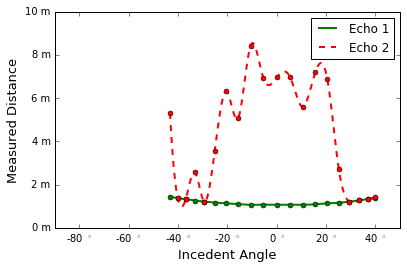

In [33]:
# drive plot seperately for glass or wall  

x =x_g =x_w = []
A =A_g =A_w = []
I1 =I1_g =I1_w = []
I2 =I2_g =I2_w = []
R1 =R1_g =R1_w = []
R2 =R2_g =R2_w = []
I1_Norm =I1_g_Norm =I1_w_Norm = []
I2_Norm =I2_g_Norm =I2_w_Norm = []
single_r=[]
single_i=[]
p= [106.5,440]
targets = getargets(p)
for key in sorted(targets):
    x.append(key)
    if np.degrees(targets[key][0]) < 0: 
        A.append(90+np.degrees(targets[key][0]))
    else:
        A.append(-90+np.degrees(targets[key][0]))
    I1.append(targets[key][1])
    I2.append(targets[key][3])
    R1.append(targets[key][2])
    R2.append(targets[key][4])
    I1_Norm.append(targets[key][1]*(targets[key][2]**2))
    I2_Norm.append(targets[key][3]*(targets[key][4]**2))
    if targets[key][1]>targets[key][3]:
        single_r.append(targets[key][2])
        single_i.append(targets[key][1])
    else:
        single_r.append(targets[key][4])
        single_i.append(targets[key][3])
    

print(A)
gr2=pltsmoo(A,R2)
gr1=pltsmoo(A,R1)
plt.figure(4)
plt.plot(gr1[0],gr1[1], 'g-', linewidth= 2, label='Echo 1')
plt.plot(gr2[0],gr2[1],'r--',linewidth= 2, label='Echo 2') 
plt.plot(A,R1, 'go', A,R2,'ro', markersize =5)
plt.xlabel('Incedent Angle',size=13)

plt.ylabel('Measured Distance',size=13)
plt.ylim([0,10])
plt.xlim([-90,50])
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $^\circ$'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d m'))
plt.subplots_adjust(top=0.90, bottom=0.15, left=0.15, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.legend()

# plt.title('Distance Values of Two Echoes at Point B (Glass)', size=14)
plt.savefig('11.png', bbox_inches='tight')
plt.show()

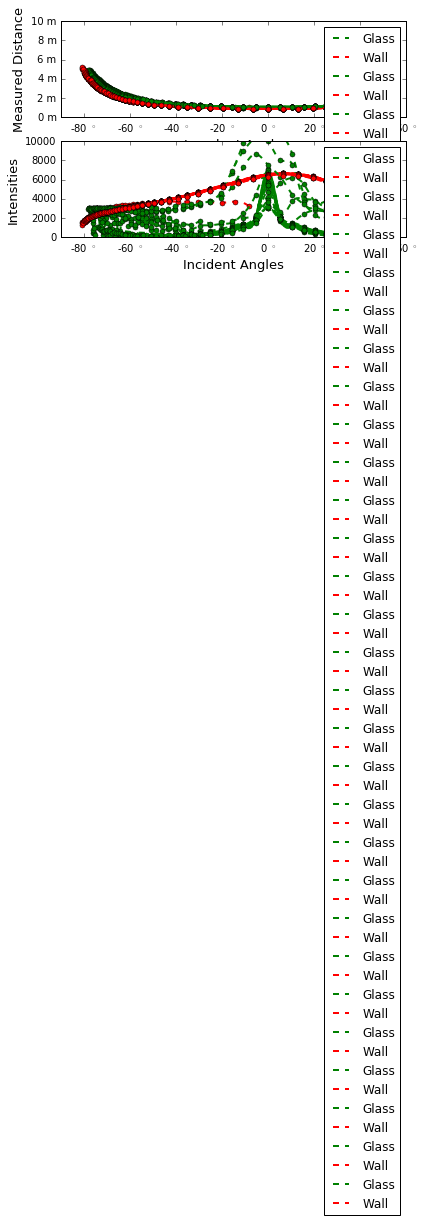

In [37]:
# plot for comparing glass and wall

plt.figure(5)

for i in np.arange(270,550,10):
    x_w =[]
    A_w = []
    I1_w = []
    I2_w = []
    R1_w = []
    R2_w = []
    I1_w_Norm = []
    I2_w_Norm = []
    targets_w = getargets([-85.5,i])
    x_g =[]
    A_g =[]
    I1_g =[]
    I2_g =[]
    R1_g =[]
    R2_g =[]
    I1_g_Norm =[]
    I2_g_Norm =[]
    targets_g = getargets([106.5,i])
    for key in sorted(targets_w):
        x_w.append(key)
        if np.degrees(targets_w[key][0]) < 0: 
            A_w.append(90+np.degrees(targets_w[key][0]))
        else:
            A_w.append(-90+np.degrees(targets_w[key][0]))
        I1_w.append(targets_w[key][1])
        I2_w.append(targets_w[key][3])
        R1_w.append(targets_w[key][2])
        R2_w.append(targets_w[key][4])
        I1_w_Norm.append(targets_w[key][1]*(targets_w[key][2]**2))
        I2_w_Norm.append(targets_w[key][3]*(targets_w[key][4]**2))
        
    for key in sorted(targets_g):
        x_g.append(key)
        if np.degrees(targets_g[key][0]) < 0: 
            A_g.append(-(90+np.degrees(targets_g[key][0])))
        else:
            A_g.append(90-np.degrees(targets_g[key][0]))
        I1_g.append(targets_g[key][1])
        I2_g.append(targets_g[key][3])
        R1_g.append(targets_g[key][2])
        R2_g.append(targets_g[key][4])
        I1_g_Norm.append(targets_g[key][1]*(targets_g[key][2]**2))
        I2_g_Norm.append(targets_g[key][3]*(targets_g[key][4]**2))
    
    
    plt.subplot(211)
    IG=pltsmoo(A_g,R1_g)
    IW=pltsmoo(A_w,R1_w)
    plt.plot(IG[0],IG[1], 'g--', linewidth= 2, label='Glass')
    plt.plot(IW[0],IW[1],'r--',linewidth= 2, label='Wall') 
    plt.plot(A_g,R1_g, 'go', A_w,R1_w,'ro', markersize =5)
    plt.xlabel('Incedent Angle',size=13)
    plt.axis([-90,60,0,10])
    plt.legend(loc='upper right',prop={'size':12})
    plt.ylabel('Measured Distance',size=13)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d m'))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $^\circ$'))
    
    
    plt.subplot(212)
    IGN=pltsmoo(A_g,I1_g)
    IWN=pltsmoo(A_w,I1_w)
    plt.plot(IGN[0],IGN[1], 'g--', linewidth= 2, label='Glass')
    plt.plot(IWN[0],IWN[1],'r--',linewidth= 2, label='Wall') 
    plt.plot(A_g, I1_g, 'go', A_w,I1_w,'ro', markersize =5)
    plt.axis([-90,60,0,10000])
    plt.legend(loc='upper right',prop={'size':12})
    plt.ylabel('Intensities',size=13)
    plt.xlabel('Incident Angles',size=13)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $^\circ$'))
    
    plt.subplots_adjust(top=0.90, bottom=0.15, left=0.15, right=0.95, hspace=0.25,
                        wspace=0.35)

# plt.grid(alpha=0.8)
# plt.savefig("example6.eps")
plt.show(2)

[ 1889.75789474  1933.02631579  1915.35789474  1906.78010471  1973.83597884
  2061.66315789  2179.67539267  2243.03141361  2271.51832461  2332.7606383
  2347.60106383  2406.40837696  2414.87368421  2426.48148148  2463.70212766
  2499.59840426  2545.875       2602.61578947  2631.10677083  2661.36842105
  2718.98254799  2758.13947368  2816.02894737  2878.38800705  2939.07192982
  2992.0122164   3056.20811518  3112.44791667  3201.40526316  3286.73227513
  3393.47434555  3492.63508772  3604.87234043  3735.41819372  3915.89736842
  4121.42865497  4325.30574163  4587.55017452  4952.67562068  5346.04786836
  5790.91422872  6210.88190789  6542.58392362  6657.97585979  6566.57395288
  6321.90052356  5927.95540098  5349.03679078  4818.21885522  4370.90277778
  3986.1043883 ]


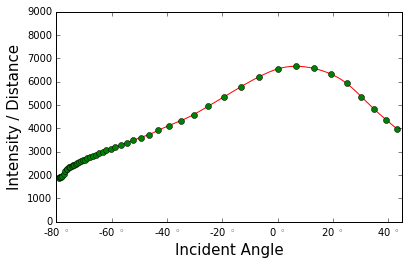

In [36]:
# only glass for test
import scipy.interpolate as inter

x_g =[]
A_g =[]
I1_g =[]
I2_g =[]
R1_g =[]
R2_g =[]
I1_g_Norm =[]
I2_g_Norm =[]
targets_g = getargets([106.5,440])
for key in sorted(targets_g):
    x_g.append(key)
    if np.degrees(targets_g[key][0]) < 0: 
        A_g.append(90+np.degrees(targets_g[key][0]))
    else:
        A_g.append(-90+np.degrees(targets_g[key][0]))
    I1_g.append(targets_g[key][1])
    I2_g.append(targets_g[key][3])
    R1_g.append(targets_g[key][2])
    R2_g.append(targets_g[key][4])
    I1_g_Norm.append(targets_g[key][1]*(targets_g[key][2]**2))
    I2_g_Norm.append(targets_g[key][3]*(targets_g[key][4]**2))
# print(x_g)
x=np.array(A_w)
y=np.array(I1_w)
xx = np.arange(x.min(),x.max(),0.1)
s1 = inter.InterpolatedUnivariateSpline (x[::1], y[::1])
print(y)
plt.figure(6)
plt.plot(xx, s1(xx), 'r-',label='s1(xx)')
plt.plot(A_w, I1_w, 'go',label='I1_g_norm')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $^\circ$'))
# plt.plot(A_g, I1_g_Norm, 'r-', A_w, I1_w_Norm, 'g-')
# plt.plot(x_smooth,y_smooth,'r',A_g, I1_g, 'go')
plt.ylabel('Intensity / Distance', size=15)
plt.xlabel('Incident Angle',size=15)
plt.subplots_adjust(top=0.90, bottom=0.17, left=0.15, right=0.95, hspace=0.25,
                        wspace=0.35)
plt.axis([-80,45,0,9000])
# plt.legend()
plt.show(2)

In [28]:
# For checking the contents
print(scans[150].shape)
ts =[]
for i in np.arange(20):
    print(scans[0][100+i,0])
    ts.append(scans[0][100+i])
ts = np.asarray(ts)
print(ts)
print(np.mean(ts,axis=0))
#print(np.degrees(np.arctan(10.0/106.5)))
#np.degrees(angle_min)

(1081, 5)
-1.91986218653
-1.91549886343
-1.91113554034
-1.90677221724
-1.90240889415
-1.89804557105
-1.89368224795
-1.88931892486
-1.88495560176
-1.88059227867
-1.87622895557
-1.87186563247
-1.86750230938
-1.86313898628
-1.85877566318
-1.85441234009
-1.85004901699
-1.8456856939
-1.8413223708
-1.8369590477
[[ -1.91986219e+00   5.16014737e+03   7.16521051e-01   5.16014737e+03
    7.16521051e-01]
 [ -1.91549886e+00   5.19156316e+03   7.15663158e-01   5.19156316e+03
    7.15663158e-01]
 [ -1.91113554e+00   5.19791053e+03   7.14952632e-01   5.19791053e+03
    7.14952632e-01]
 [ -1.90677222e+00   5.18303158e+03   7.13921051e-01   5.18303158e+03
    7.13921051e-01]
 [ -1.90240889e+00   5.15680526e+03   7.12289474e-01   5.15680526e+03
    7.12289474e-01]
 [ -1.89804557e+00   5.12156842e+03   7.11057892e-01   5.12156842e+03
    7.11057892e-01]
 [ -1.89368225e+00   5.17897895e+03   7.09373683e-01   5.17897895e+03
    7.09373683e-01]
 [ -1.88931892e+00   5.16833684e+03   7.09110525e-01   5.168336

In [9]:
#calculate the mean and standard deviation of all data
print('{:10}{:10}'.format('Experiment','Mean','Std'))
for key, value in idata_mean.iteritems():
    print(np.mean(idata),np.std(idata))
    print(np.mean(rdata),np.std(rdata))

ExperimentMean      


In [13]:
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import math
from scipy.interpolate import spline
from matplotlib.ticker import FormatStrFormatter
import scipy.interpolate as inter
import numpy as np
# from basic_units import radians, degrees, cos
import matplotlib.units as units
from __future__ import print_function
import sys
#standard libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import time
#Ros related libraries
import yaml
import rospy
import rosbag
import glob # for open all files
import re

In [28]:
np.degrees(np.arctan(0.01))

0.57293869768348593